# Fusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
!pip install xlrd

## Testing

In [2]:
## Create Test Data.
predict1 = [[0, 2, 2, 2, 1, 1, 0, 1, 2, 2], [0.6, 0.8, 1, 0.7, 0.4, 0.6, 0.3, 0.9, 0.8, 0.5],[0, 0, 0, 1, 1, 1, 2, 2, 2, 2]]
predict2 = [[1, 0, 0, 1, 0, 2, 0, 0, 2, 2], [0.5, 0.5, 0.3, 0.6, 0.7, 0.8, 0.9, 0.4, 0.7, 0.8],[0, 0, 0, 1, 1, 1, 2, 2, 2, 2]]
pd1 = pd.DataFrame(predict1)
pd1.transpose().to_csv("data1.csv", sep=',')
pd2 = pd.DataFrame(predict2)
pd2.transpose().to_csv("data2.csv", sep=',')

visual_data = pd.read_csv("data1.csv").transpose().values.tolist()
audio_data = pd.read_csv("data2.csv").transpose().values.tolist()

In [3]:
## Get predictions from each modality. 
visual_data = pd.read_csv("data1.csv").transpose().values.tolist()
audio_data = pd.read_csv("data2.csv").transpose().values.tolist()

visual_predict = visual_data[1]
visual_prob = visual_data[2]
audio_predict = audio_data[1]
audio_prob = audio_data[2]
annotations = visual_data[3] # visual_data[2] == audio_data[2]

## Extract prediction data for fusion

In [4]:
visual_predict = pd.read_csv("svm_prediction.csv").transpose().values.tolist()[1]
visual_prob = pd.read_csv("svm_prediction_probability.csv").values.tolist()
audio_predict = pd.read_csv("predictions_audio.csv").transpose().values.tolist()[1]
audio_prob = pd.read_csv("predictions_probabilities_audio.csv").values.tolist()
annotations = pd.read_excel("annotations_test.xlsx").transpose().values.tolist()[0]

In [5]:
for i in range(len(visual_prob)):
  visual_prob[i] = max(visual_prob[i][1:])
  audio_prob[i] = max(audio_prob[i][1:])


# Get predictions success rate based of weights

In [6]:
# Get predictions success rate based of weights
weights = list(range(0, 101, 10)) 

def fusion_mechanism(video_weight, audio_weight, visual_prob, audio_prob, visual_predict, audio_predict):  
  # get the predictions given a certain weight for video and audio.
  predict = []
  for i in range(len(visual_prob)):
    vid_guess = visual_prob[i] * video_weight
    aud_guess = audio_prob[i] * audio_weight
    if vid_guess > aud_guess:
      predict.append(visual_predict[i])
    else:
      predict.append(audio_predict[i])
  return predict

def find_prediction_rate(prediction, real):
  # returns the percentage of correct guesses.
  num_of_correct = 0.0
  for i in range(len(prediction)):
    if prediction[i] == real[i]:
      num_of_correct += 1
  return num_of_correct / len(prediction)

fusion = []
for outer in weights:
  guessing_prob = []
  for inner in weights:
    predict = fusion_mechanism(outer, inner, visual_prob, audio_prob, visual_predict, audio_predict)
    guessing_prob.append(find_prediction_rate(predict, annotations))
  fusion.append(guessing_prob)


# Plot data

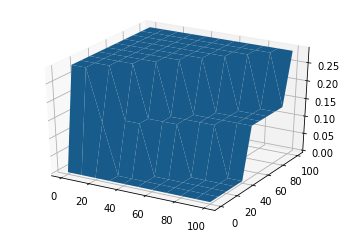

In [7]:
# Plot data 
data = np.array(fusion)
plot = plt.figure()
plot_3d = plot.add_subplot(111, projection='3d')

x, y = np.meshgrid(weights, weights)  # `plot_surface` expects `x` and `y` data to be 2D
plot_3d.plot_surface(x, y, data, shade=True)
#plot_3d.view_init(30, 30)
plt.show()

# Find the indices of weights with the highest number of correct guesses

In [8]:
# Find the indices of weights with the highest number of correct guesses.
max_indices = np.where(data == np.amax(data))
max_index_x = max_indices[0].tolist()
max_index_y = max_indices[1].tolist()

# Print the weight of the first instance of the max value
print(weights[max_index_x[0]], weights[max_index_y[0]])

10 0


In [9]:
print("Prediction rate:", fusion[3][2])

Prediction rate: 0.2857142857142857
